[//]: # "Markdown code cells can either be displayed in a rendered fashion, or as source. You are now looking at the source code, and this is a comment."
[//]: # "To exit this mode, you must 'run' this markdown block."
[//]: # "In Jupyter Lab: you make sure this block is selected, and then press the 'run' button. In VSC you press the ✓ (check mark)"
[//]: # "In both programs pressing 'CTRL'+'ENTER' will run the current cell."
# TSKS37 Engineering computations in Python
Welcome!

Good to see that you made it into this notebook. Let us get into the assignments!
This fist part will focus on these two python packages:
- **Numpy:** This package efficiently implements methods primarily used for vector/matrix math, but also contains many related functions.
- **Matplotlib:** This package provides a large set of tools for visualizing our data by creating all sorts of plots. 

This notebook has many small assignments you should complete, but be calm, just start from the top and you will learn what you need. Note that throughout we give a brief explanation of the functions, and refer to the documentation where you find all the details.

# NumPy
As always, we must first import numpy

In [123]:
# We usually name numpy as np
import numpy as np

[//]: # "Markdown code cells can either be displayed in a rendered fashion, or as source. You are now looking at the source code, and this is a comment."
[//]: # "To exit this mode, you must 'run' this markdown block."
[//]: # "In Jupyter Lab: you make sure this block is selected, and then press the 'run' button. In VSC you press the ✓ (check mark)"
[//]: # "In both programs pressing 'CTRL'+'ENTER' will run the current cell."

## 1.1. Array creation

First, we need some data to work with. We ask you to create and print these arrays using `np.array`:

1. The vector $\begin{pmatrix}3&1&4&1&5&9\end{pmatrix}$ (A 1-D array)
2. The fat matrix $\begin{pmatrix}3&1&4\\1&5&9\end{pmatrix}$ (A 2-D array)
3. The tall matrix $\begin{pmatrix}3&1\\4&1\\5&9\end{pmatrix}$ (A 2-D array)

You'll find all the information you need in [Numpy Documentation: Array creation](https://numpy.org/doc/stable/user/basics.creation.html)

**A note about why we **dont** use np.matrix.**
As stated in [numpy.matrix reference](https://numpy.org/doc/stable/reference/generated/numpy.matrix.html#numpy.matrix) it is not recommended to use this because it might become deprecated. We use **np.array** when creating an array from a python iterable (*e.g.* a list).


In [124]:
vector = np.array([3, 1, 4, 1, 5, 9])

fat_matrix = np.array([[3, 1 ,4], [1, 5, 9]])

tall_matrix = np.array([[3, 1], [4, 1], [5, 9]])

print(vector)
print(fat_matrix)
print(tall_matrix)

[3 1 4 1 5 9]
[[3 1 4]
 [1 5 9]]
[[3 1]
 [4 1]
 [5 9]]


[//]: # "Markdown code cells can either be displayed in a rendered fashion, or as source. You are now looking at the source code, and this is a comment."
[//]: # "To exit this mode, you must 'run' this markdown block."
[//]: # "In Jupyter Lab: you make sure this block is selected, and then press the 'run' button. In VSC you press the ✓ (check mark)"
[//]: # "In both programs pressing 'CTRL'+'ENTER' will run the current cell."

## 1.2. More ways to create arrays
There are more ways to create arrays. You will now test a few of these methods from [Numpy Documentation: Array creation routines](https://numpy.org/doc/stable/reference/routines.array-creation.html), you will need to use functions from **"From shape or value"** and **"Numerical ranges"**. For $m<n$, create code that achieves:

1. An $n\times m$ matrix of zeros
2. A range from $m$ to $n$, _i.e._, the sequence $m,m+1,...,n-1,n$.
3. 10 Values equally space between $m$ and $n$
4. An $n\times n$ identity matrix 
5. A matrix of $n$ rows and $m$ columns with increasing integers starting from $0$. More specifically: $$\begin{pmatrix}0&1&...&m-1\\ m & m+1 & ... & 2m-1\\\vdots & \vdots& \ddots &\vdots \\
 n(m-1) & n(m-1) +1 & ... & mn-1\end{pmatrix}$$ 
 
_On the usage of the `reshape()` command:_

The `reshape()` function is incredibly useful for rearranging array shapes, but **it can produce unexpected results if misused**. This behavior is related to how data is stored in memory, which is beyond the scope of this course. If you notice that the values in your reshaped array are increasing first down a column and then across rows, it indicates FORTRAN-style (column-major) memory ordering. You can easily fix this by enforcing row-major (C-style) ordering: add the argument `order='C'` to your `reshape()` command.

In [125]:
n = 10
m = 7

zero_matrix = np.zeros([n, m])

m_to_n_range = np.arange(m, n + 1)

m_to_n_samples = np.linspace(m, n)

identity_matrix = np.eye(n)

large_matrix = np.arange(0, m*n, 1).reshape([m, n])

print(large_matrix)

[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]
 [30 31 32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49]
 [50 51 52 53 54 55 56 57 58 59]
 [60 61 62 63 64 65 66 67 68 69]]


[//]: # "Markdown code cells can either be displayed in a rendered fashion, or as source. You are now looking at the source code, and this is a comment."
[//]: # "To exit this mode, you must 'run' this markdown block."
[//]: # "In Jupyter Lab: you make sure this block is selected, and then press the 'run' button. In VSC you press the ✓ (check mark)"
[//]: # "In both programs pressing 'CTRL'+'ENTER' will run the current cell."

## 1.3. Indexing arrays
Great, now we know how to create some basic arrays which we can manipulate. One of the most common things we do with arrays is access a subset of its elements. We call this procedure indexing, or slicing, and you will now pick out parts of `large_matrix` which you created before. 

We want you to:
<ol>
<li>Get the element from the second row and column.</li>
<li>Get the element from the second <b>to last</b> row and column.</li>
<li>Get the top left 2 by 2 submatrix.</li>
<li>Get the element(s) from the third row and:</li>
<ol type="A">
  <li>All columns</li>
  <li>Get up to, and including, the third column</li>
  <li>Get odd numbered column (<i>i.e.</i> first, third and so on)</li>
  <li>Both B. and C. at the same time</li>
</ol>
<li>Get the last 3 rows and even numbered columns (<i>i.e.</i> second, fourth and so on)</li>
<li>Get the third row in reversed order. </li>
</ol>

- *Note: For each task/subtask we expect a single square bracket.*
- *Note: Python indexing starts at 0, thus the first column (odd) has index 0 (even).*

[Numpy Documentation: Indexing](https://numpy.org/doc/stable/user/basics.indexing.html)


In [126]:
print("1.",large_matrix[1, 1])

print("2.",large_matrix[-2, -2])

print("3.",large_matrix[0:2, 0:2])

print("4.A.",large_matrix[2])

print("4.B.",large_matrix[2, 0:3])

print("4.C.",large_matrix[2, 0::2])

print("4.D.",large_matrix[2, 0:3:2])

print("5.",large_matrix[-3:, 1::2])

print("6.",large_matrix[2, ::-1])

1. 11
2. 58
3. [[ 0  1]
 [10 11]]
4.A. [20 21 22 23 24 25 26 27 28 29]
4.B. [20 21 22]
4.C. [20 22 24 26 28]
4.D. [20 22]
5. [[41 43 45 47 49]
 [51 53 55 57 59]
 [61 63 65 67 69]]
6. [29 28 27 26 25 24 23 22 21 20]


[//]: # "Markdown code cells can either be displayed in a rendered fashion, or as source. You are now looking at the source code, and this is a comment."
[//]: # "To exit this mode, you must 'run' this markdown block."
[//]: # "In Jupyter Lab: you make sure this block is selected, and then press the 'run' button. In VSC you press the ✓ (check mark)"
[//]: # "In both programs pressing 'CTRL'+'ENTER' will run the current cell."

## 1.4. Using operands and built-in functions on arrays

Hard-coding which column we select is sometimes what we want, but dynamically finding columns, *e.g.*, the column with the largest sum, is also common and useful. You will now start to explore how to do this!

### 1.4.1. Using operands on arrays
If one uses a python operand (+,-,<,|, etc.) between **an array and a scalar** the operation is applied to all elements individually.

1. Print `large_matrix` every element is squared.
2. Print where elements greater than $2m+n$ are located. (It is sufficient to print a boolean array)

In [127]:
print("1. Sqaured elements:\n", large_matrix ** 2)

print("2. Element location:\n", np.argwhere(large_matrix > 2*m+n))


1. Sqaured elements:
 [[   0    1    4    9   16   25   36   49   64   81]
 [ 100  121  144  169  196  225  256  289  324  361]
 [ 400  441  484  529  576  625  676  729  784  841]
 [ 900  961 1024 1089 1156 1225 1296 1369 1444 1521]
 [1600 1681 1764 1849 1936 2025 2116 2209 2304 2401]
 [2500 2601 2704 2809 2916 3025 3136 3249 3364 3481]
 [3600 3721 3844 3969 4096 4225 4356 4489 4624 4761]]
2. Element location:
 [[2 5]
 [2 6]
 [2 7]
 [2 8]
 [2 9]
 [3 0]
 [3 1]
 [3 2]
 [3 3]
 [3 4]
 [3 5]
 [3 6]
 [3 7]
 [3 8]
 [3 9]
 [4 0]
 [4 1]
 [4 2]
 [4 3]
 [4 4]
 [4 5]
 [4 6]
 [4 7]
 [4 8]
 [4 9]
 [5 0]
 [5 1]
 [5 2]
 [5 3]
 [5 4]
 [5 5]
 [5 6]
 [5 7]
 [5 8]
 [5 9]
 [6 0]
 [6 1]
 [6 2]
 [6 3]
 [6 4]
 [6 5]
 [6 6]
 [6 7]
 [6 8]
 [6 9]]


[//]: # "Markdown code cells can either be displayed in a rendered fashion, or as source. You are now looking at the source code, and this is a comment."
[//]: # "To exit this mode, you must 'run' this markdown block."
[//]: # "In Jupyter Lab: you make sure this block is selected, and then press the 'run' button. In VSC you press the ✓ (check mark)"
[//]: # "In both programs pressing 'CTRL'+'ENTER' will run the current cell."

### 1.4.2. Using built-in function
There are many, all can be found in [Numpy Documentation: Mathematical functions](https://numpy.org/doc/stable//reference/routines.math.html), of which you will use many throughout the labs. 

3. Print the sum of each column.
4. Print mean of each row.


- *Note: Most of these function can be called in two ways equivalent ways (using `max` as the example): `large_matrix.max()`, or `np.max(large_matrix)`*.
- *Note: When working with multidimensional arrays we must specify the axis.*


In [128]:
print("3. Column sum\n", large_matrix.sum(axis=0))

print("4. Row mean\n", large_matrix.mean(axis=1))

3. Column sum
 [210 217 224 231 238 245 252 259 266 273]
4. Row mean
 [ 4.5 14.5 24.5 34.5 44.5 54.5 64.5]


[//]: # "Markdown code cells can either be displayed in a rendered fashion, or as source. You are now looking at the source code, and this is a comment."
[//]: # "To exit this mode, you must 'run' this markdown block."
[//]: # "In Jupyter Lab: you make sure this block is selected, and then press the 'run' button. In VSC you press the ✓ (check mark)"
[//]: # "In both programs pressing 'CTRL'+'ENTER' will run the current cell."

### 1.4.3. Combining slicing, operands and built-in function:

Now you are going to filter the columns conditioned on the matrix itself: 

5. Print rows with a row sum larger than the given threshold.
6. Print columns with a column sum larger than the given threshold.
7. Set all odd elements to zero. *(Hint: modulus operator `%`)*
8. Change the sign of all elements strictly smaller than $2m+n$, *i.e.*, 3 and -2 becomes -3, and 2, respectively.

- [Numpy Documentation: Boolean array indexing](https://numpy.org/doc/stable/user/basics.indexing.html#boolean-array-indexing)

*Note: Since you will now modify `large_matrix`, paste the code to create it here*

In [129]:
large_matrix = np.arange(0, m*n, 1).reshape([m, n]) 

threshold = 345
print("5. Columns with sum larger than the threshold\n", large_matrix[:, large_matrix.sum(axis=0) > threshold])

print("6. Rows with sum larger than the threshold\n", large_matrix[large_matrix.sum(axis=1) > threshold, :])

large_matrix[large_matrix % 2 != 0] = 0
print("7.", large_matrix)

# Remake large_matrix
large_matrix = np.arange(0, m*n, 1).reshape([m, n]) 

# 8
large_matrix[large_matrix < 2*m+n] = -1*large_matrix[large_matrix < 2*m+n]
print("8.", large_matrix)

5. Columns with sum larger than the threshold
 []
6. Rows with sum larger than the threshold
 [[40 41 42 43 44 45 46 47 48 49]
 [50 51 52 53 54 55 56 57 58 59]
 [60 61 62 63 64 65 66 67 68 69]]
7. [[ 0  0  2  0  4  0  6  0  8  0]
 [10  0 12  0 14  0 16  0 18  0]
 [20  0 22  0 24  0 26  0 28  0]
 [30  0 32  0 34  0 36  0 38  0]
 [40  0 42  0 44  0 46  0 48  0]
 [50  0 52  0 54  0 56  0 58  0]
 [60  0 62  0 64  0 66  0 68  0]]
8. [[  0  -1  -2  -3  -4  -5  -6  -7  -8  -9]
 [-10 -11 -12 -13 -14 -15 -16 -17 -18 -19]
 [-20 -21 -22 -23  24  25  26  27  28  29]
 [ 30  31  32  33  34  35  36  37  38  39]
 [ 40  41  42  43  44  45  46  47  48  49]
 [ 50  51  52  53  54  55  56  57  58  59]
 [ 60  61  62  63  64  65  66  67  68  69]]


[//]: # "Markdown code cells can either be displayed in a rendered fashion, or as source. You are now looking at the source code, and this is a comment."
[//]: # "To exit this mode, you must 'run' this markdown block."
[//]: # "In Jupyter Lab: you make sure this block is selected, and then press the 'run' button. In VSC you press the ✓ (check mark)"
[//]: # "In both programs pressing 'CTRL'+'ENTER' will run the current cell."


**One last note:**
When performing an operation `arr < threshold`, a boolean matrix is returned. Sometimes when indexing an array, the indices are preferred over this boolean matrix. You can convert the boolean matrix to the indices using `np.where()`, e.g. `ind = np.where(arr < 3)`.

## Exercise 1
You will now use the concepts from the tasks above. You have been provided code which generate a matrix. You will modify it in four steps, thus the result from one sub-task will be used in the next sub-task.

1. Change the sign of all values greater than $0$ and smaller than $10$.
2. Get all columns that have a sum greater than `th_col`.
3. Discard rows where the sum of absolute values are greater than `th_row`.
4. Print the remaining elements from largest to smallest in an 1D array.

*Rule: You must use slicing in 2. and 3..*

In [130]:
th_col = 15
th_row = 25
p = 4
np.random.seed(4)
mat = np.random.randint(-10,20,(p,p))
print("The given matrix:\n",mat)

# Implement your solution below this line

# Change the sign of all values 0 < x < 10
mat[(mat < 10) & (mat > 0)] = -1*mat[(mat < 10) & (mat > 0)]

# Get all columns with sum > th_col
mat = mat[:, mat.sum(axis=1) > th_col]

#Discard rows where sum of absolute values > th_row
mat = mat [np.abs(mat).sum(axis=1) > th_row ,:]

# Turn in to 1D sorted array
mat = mat.reshape((1,-1))
mat.sort(axis=1)

print("My final matrix:\n", mat)

The given matrix:
 [[16  4 13 -5]
 [-9 -2 13 -2]
 [ 8 -1 16 18]
 [-3  3 13 13]]
My final matrix:
 [[-8 -5 -3 13 13 13 16 16 18]]


[//]: # "Markdown code cells can either be displayed in a rendered fashion, or as source. You are now looking at the source code, and this is a comment."
[//]: # "To exit this mode, you must 'run' this markdown block."
[//]: # "In Jupyter Lab: you make sure this block is selected, and then press the 'run' button. In VSC you press the ✓ (check mark)"
[//]: # "In both programs pressing 'CTRL'+'ENTER' will run the current cell."

# 2.1. Matrix operations

From linear algebra there is a set of functions that we apply to vectors and matrices. 

Numpy has already implemented a wide range of these function, which can all be found in [Numpy Documentation: Linalg Module](https://numpy.org/doc/stable/reference/routines.linalg.html).

A very small subset of these function are, given that $A \in \mathbb{R}^{n\times p}$, $B \in \mathbb{R}^{p\times m}$, and $c,d \in \mathbb{R}^{r}$.
- **Matrix multiplication**:`np.matmul(A,B)`, or `A@B`.
- **Transpose** `np.transpose(A)`, or `A.T`.
- **Dot product** `np.dot(c,d)`.
- **Norm** `np.norm(c)`. 

Let's test some of these functions! With the given two vectors $c$ and $d$ compute and print 
1. The inner product, *i.e.*, dot-product.
2. The outer product.

In [131]:
r = 4
np.random.seed(0)
c = np.random.randint(1,5,(r,1))
np.random.seed(1)
d = np.random.randint(1,5,(r,1))

# Implement your solution below this line

print("1. Inner product:\n", c.T@d)

print("2. Outer product:\n",c@d.T)

1. Inner product:
 [[21]]
2. Outer product:
 [[ 2  4  1  1]
 [ 8 16  4  4]
 [ 4  8  2  2]
 [ 2  4  1  1]]


[//]: # "Markdown code cells can either be displayed in a rendered fashion, or as source. You are now looking at the source code, and this is a comment."
[//]: # "To exit this mode, you must 'run' this markdown block."
[//]: # "In Jupyter Lab: you make sure this block is selected, and then press the 'run' button. In VSC you press the ✓ (check mark)"
[//]: # "In both programs pressing 'CTRL'+'ENTER' will run the current cell."

## 2.2. Broadcasting

When performing operations between arrays of different shapes, like multiplying a matrix by a scalar, you might wonder why it just works. The answer lies in *broadcasting*, a NumPy mechanism that adjusts arrays with smaller or mismatched shapes to make arithmetic operations possible.

### 2.2.1. Broadcasting arrays and scalars

When multiplying a matrix $a$ by a scalar $b$, NumPy conceptually stretches $b$ into the same shape as $a$, making every element in a multiply by b. This is visualized below in the following image

<div>
<img style="background-color: #ABBAEA;" src="https://numpy.org/doc/stable/_images/broadcasting_1.png" height="200"/>
</div>

While this can make programs more clear and more efficient, this can also give rise to unwanted behavior, or more likely causing the program to crash, when it is not managed properly. 


You can find a thorough walk-through in [Numpy Documentation: Broadcasting](https://numpy.org/doc/stable/user/basics.broadcasting.html).


1. Implement the example in the image

In [132]:
a = np.array([1, 2, 3])
b = 2
result = a*b

print("2.1.", result)

2.1. [2 4 6]


[//]: # "Markdown code cells can either be displayed in a rendered fashion, or as source. You are now looking at the source code, and this is a comment."
[//]: # "To exit this mode, you must 'run' this markdown block."
[//]: # "In Jupyter Lab: you make sure this block is selected, and then press the 'run' button. In VSC you press the ✓ (check mark)"
[//]: # "In both programs pressing 'CTRL'+'ENTER' will run the current cell."

### 2.2.2. Broadcasting two arrays
Broadcasting extends to two arrays of any shape when applying arithmetic operations element-wise, if their shapes are compatible. 

This concept allows us to perform ,*e.g.*, row- and column-wise operations, which is the topic of the problems below. You will find many helpful examples in the [Broadcasting Documentation](https://numpy.org/doc/stable/user/basics.broadcasting.html#broadcastable-arrays), and clues to solutions for the problems below. 

Given $A\in\mathbb{R}^{3\times2},b\in\mathbb{R}^{2},c\in\mathbb{R}^{3}$:
1. Multiply column one of $A$ with the first element in $b$, and second column of $A$ with the second element in $b$.
2. Multiply row one of $A$ with the first element in $c$, and the second row of $A$ with the second element in $c$, and so on...

_Tip: For controlling broadcasting you need to pay close attention to the number of dimensions, and the length of each dimension. You find this information using `.shape` property of an array._

*Rule: You must use broadcasting directly by manipulating the `shape`, thus you __aren't__ allowed to transpose any matrices (including by calling, e.g., `np.reshape`).*

[Numpy Documentation: Increase the number of dimension(s)](https://numpy.org/doc/stable/reference/generated/numpy.expand_dims.html)

In [156]:
A = np.array([[2,7],[8,1],[5,3]])  
b = np.array([3,5])
c = np.array([1,3,4])

# print("A:\n", A )
# print("b:\n", b)
# print("c\n", c)

print("2.2.\n", A*b)
print("2.3\n", A*np.expand_dims(c, axis=1))

A:
 [[2 7]
 [8 1]
 [5 3]]
b:
 [3 5]
c
 [1 3 4]
2.2.
 [[ 6 35]
 [24  5]
 [15 15]]
2.3
 [[ 2  7]
 [24  3]
 [20 12]]


[//]: # "Markdown code cells can either be displayed in a rendered fashion, or as source. You are now looking at the source code, and this is a comment."
[//]: # "To exit this mode, you must 'run' this markdown block."
[//]: # "In Jupyter Lab: you make sure this block is selected, and then press the 'run' button. In VSC you press the ✓ (check mark)"
[//]: # "In both programs pressing 'CTRL'+'ENTER' will run the current cell."

## Exercise 2
You will now continue by normalizing `large_matrix` such that the norm of each column is $1$, using the standard euclidean norm. 
As a second exercise, you will normalize such that the norm of each row is $1$.

We can mathematically describe the column normalization for the matrix
$$A = \begin{pmatrix}|&|&&|\\a_1&a_2&...&a_n\\|&|&&|\end{pmatrix} \in\mathbb{R}^{m\times n},$$ 
where $a_i$ is the $i$-th column. Now, we firstly construct each column that have length $1$ by
$$\tilde{a}_1 = \frac{a_1}{\Vert a_1 \Vert}.$$
As a second step, we combine these into the column normalized matrix
$$\tilde{A} = \begin{pmatrix}|&|&&|\\\tilde{a}_1&\tilde{a}_2&...&\tilde{a}_n\\|&|&&|\end{pmatrix}.$$
When row normalizing the argument is almost identical, but treat each row instead of column
$$B = \begin{pmatrix}-& b_1&-\\-& b_2&-\\&\vdots&\\-& b_m&-\\\end{pmatrix},$$ 

Print your results for normalizing with respect to each column and with respect to each row.

_Tip: One again, be careful with the dimensions. This will allow you to use broadcasting along the correct dimension!_

*Rule: You must use broadcasting directly, thus you __aren't__ allowed to transpose any matrices (including by calling, e.g., `np.reshape`).*

_Note: We provide code that use assert to automatically check if the norm of columns and rows are normalized, respectively._

*(Copy the code to create `large_matrix` here to ensure it is correct)*

In [181]:
large_matrix = large_matrix = np.arange(0, m*n, 1).reshape([m, n]) 


matrix_column_normalized = large_matrix / np.linalg.norm(large_matrix, axis=0)

matrix_row_normalized = large_matrix / np.expand_dims( np.linalg.norm(large_matrix, axis=1), axis=1)


# Check all columns have norm close to 1
assert np.allclose(1,np.linalg.norm(matrix_column_normalized,axis=0))
# and row
assert np.allclose(1,np.linalg.norm(matrix_row_normalized,axis=1))

[[ 16.88194302]
 [ 46.74398357]
 [ 78.00640999]
 [109.47602477]
 [141.01418368]
 [172.58331321]
 [204.16904761]]


[//]: # "Markdown code cells can either be displayed in a rendered fashion, or as source. You are now looking at the source code, and this is a comment."
[//]: # "To exit this mode, you must 'run' this markdown block."
[//]: # "In Jupyter Lab: you make sure this block is selected, and then press the 'run' button. In VSC you press the ✓ (check mark)"
[//]: # "In both programs pressing 'CTRL'+'ENTER' will run the current cell."

# 3. Speed
Because of how python is fundamentally constructed, it has a reputation to be slow. 
In many aspects this is true, unfortunately. However, it is still used for data-driven application which use large data sets, how can this be?

While the Python interpolator is slow, its core function is implemented in C, including numpy functions. 
Therefore to get a fast program it is key to make efficient numpy calls to speed up our program. 

We provide a simple class for measuring elapsed time, with some example usages. 

In [182]:
import time

class TimeIt:
    """A utility class for measuring elapsed time in code execution."""

    _tic = None 
    last_toc = None

    def __init__(self, name=None):
        self.name = name

    """Context manager functions."""
    def __enter__(self):
        self._env_tic = time.time()

    def __exit__(self, type, value, traceback):
        elapsed = time.time() - self._env_tic
        print(f"{f'[{self.name}] ' if self.name else ''}Elapsed: {self._format_time(elapsed)}")

    @classmethod
    def tic(cls):
        cls._tic = time.time()
        cls.last_toc = None

    @classmethod
    def toc(cls, name=None):
        """
        Print the elapsed time since the last `tic` and `toc`.
        """
        toc_time = time.time()
        elapsed_since_tic = toc_time - cls._tic
        elapsed_since_last_toc = toc_time - cls.last_toc if cls.last_toc else None

        print(f"{f'[{name}] ' if name else ''}Elapsed: {cls._format_time(elapsed_since_tic)}",end="")

        if cls.last_toc:
            print(f", Time delta: {cls._format_time(elapsed_since_last_toc)}")
        else:
            print("")

        cls.last_toc = toc_time

    @staticmethod
    def _format_time(duration):
        """
        Returns a formatted time string.
        """
        # Milliseconds
        if duration < 1:
            return f"{duration * 10_000:.3f} ms"
        # Seconds
        else:
            return f"{duration:.4f} s"

### EXAMPLE USAGES

# Example with an unnamed block
with TimeIt():
    time.sleep(0.2)

# Example with a named block
with TimeIt("My first timer"):
    time.sleep(0.3)

# Start the timer
TimeIt.tic()
time.sleep(0.4)

# First checkpoint
TimeIt.toc("First checkpoint")

# Another checkpoint
time.sleep(0.1)
TimeIt.toc()

# Final checkpoint
time.sleep(0.005)  # Very short sleep
TimeIt.toc("Short checkpoint")

Elapsed: 2050.631 ms
[My first timer] Elapsed: 3007.751 ms
[First checkpoint] Elapsed: 4052.272 ms
Elapsed: 5105.212 ms, Time delta: 1052.940 ms
[Short checkpoint] Elapsed: 5166.950 ms, Time delta: 61.738 ms


[//]: # "Markdown code cells can either be displayed in a rendered fashion, or as source. You are now looking at the source code, and this is a comment."
[//]: # "To exit this mode, you must 'run' this markdown block."
[//]: # "In Jupyter Lab: you make sure this block is selected, and then press the 'run' button. In VSC you press the ✓ (check mark)"
[//]: # "In both programs pressing 'CTRL'+'ENTER' will run the current cell."

## Exercise 3
To get a feeling for the speed difference between Python and Numpy your task is to implement the sum of all integers $0,...,n$ in three different ways:
1. Using a python for-loop. *(Find a good value for $n$ such that it takes between 0.01 and one second)*
2. Using numpy functions. 

   **NOTE:** since we are dealing with a very large number the default 32-bit integer will overflow. To change this provide `dtype=np.int64` when creating your `arrays`. 

3. Using the mathematical formula to compute it directly.

How large are the gains? What causes these gains?

In [190]:

# 1. This function should sum all integers from 0 to n using a python for loop
def sum_zero_to_n(n:int):
    running_sum = 0
    for i in range(1, n+1):
        running_sum += i
    return running_sum

# Here we set a large number to test the performance of the function
n = 1_000_000

with TimeIt("Python for-loop"):
    res_py_for = sum_zero_to_n(n)

# 2. This function should make the same computation using numpy
def sum_zero_to_n(n:int):
    num_array = np.arange(1, n+1, dtype=np.int64)
    return np.sum(num_array)

with TimeIt("Numpy arange"):
    res_numpy = sum_zero_to_n(n)

# 3. This function should make the same computation using a math formula
def sum_zero_to_n(n:int):
    return n*(n+1) / 2 

with TimeIt("Math"):
    res_math = sum_zero_to_n(n)

# Make sure all variants compute the same result
assert res_math == res_numpy == res_py_for

[Python for-loop] Elapsed: 566.173 ms
[Numpy arange] Elapsed: 13.812 ms
[Math] Elapsed: 0.019 ms


[//]: # "Markdown code cells can either be displayed in a rendered fashion, or as source. You are now looking at the source code, and this is a comment."
[//]: # "To exit this mode, you must 'run' this markdown block."
[//]: # "In Jupyter Lab: you make sure this block is selected, and then press the 'run' button. In VSC you press the ✓ (check mark)"
[//]: # "In both programs pressing 'CTRL'+'ENTER' will run the current cell."

# 4. When does numpy not behave as we expect?
There are many situations where `numpy` won't behave how we want, but there is reason for its behavior. 
Read the examples below and make sure you understand what is happening in each case.


## 4.1. Data type of the array
As in normal python each variable has a type. On creation a datatype is assigned depending on the arguments, but it can also be altered with explicit calls.

In the timing example, we needed to change the data type from `np.int32` to `np.int64` because the datatype defaulted to 32 bits.

1. What error has occurred here?

2. Give a solution such that the arithmetic operation behaves as we expect.

[Numpy Documentation: Data types](https://numpy.org/doc/stable/user/basics.types.html)

In [192]:
#Integer division

a = np.array([3,2,3])
b = np.array([1,2,2])

a[-1] /= b[-1]

print(f"a: {a},\nb: {b}")

#Solution:

a = np.array([3,2,3], dtype= float)
b = np.array([1,2,2], dtype= float)
a[-1] /= b[-1]

print(f"a: {a},\nb: {b}")

a: [3 2 1],
b: [1 2 2]
a: [3.  2.  1.5],
b: [1. 2. 2.]


[//]: # "Markdown code cells can either be displayed in a rendered fashion, or as source. You are now looking at the source code, and this is a comment."
[//]: # "To exit this mode, you must 'run' this markdown block."
[//]: # "In Jupyter Lab: you make sure this block is selected, and then press the 'run' button. In VSC you press the ✓ (check mark)"
[//]: # "In both programs pressing 'CTRL'+'ENTER' will run the current cell."

## 4.2. Copying data
When working with `numpy`, it's important to understand how data is stored and referenced. A `numpy` array holds the actual data in memory, and the variable you use (e.g., `large_matrix`) is similar to a label pointing to that data.

If you assign a `numpy` array to another variable, you're not creating a new copy of the data. Instead, both variables will point to the same data in memory. This means that changing one will also affect the other.

This behavior helps make code faster and more efficient, but it can sometimes lead to unexpected changes if you're not careful.

To avoid this and create a completely independent copy of the data, use the `.copy()` method. 
This ensures that the new array has its own copy of the data, and changes to one won't affect the other.

For C/C++ programmers: This behavior is similar to how pointers work. Assigning an array to a new variable in numpy doesn't create a deep copy — it merely points to the same underlying memory. Using `.copy()` is like explicitly creating a deep copy of the data.

1. What has happened here?

In [193]:
a = np.array([1,2])
b = a
c = a.copy()
b[0] = 3
c[1] = 4

print("a",a)
print("b",b)
print("c",c)

# Exactly what was said in the text happened...?

a [3 2]
b [3 2]
c [1 4]


[//]: # "Markdown code cells can either be displayed in a rendered fashion, or as source. You are now looking at the source code, and this is a comment."
[//]: # "To exit this mode, you must 'run' this markdown block."
[//]: # "In Jupyter Lab: you make sure this block is selected, and then press the 'run' button. In VSC you press the ✓ (check mark)"
[//]: # "In both programs pressing 'CTRL'+'ENTER' will run the current cell."

## 4.3. `NaN`, `Inf` and `-Inf`
When performing illegal arithmetic operations we get values such as `NaN`, `Inf` and `-Inf`. Each one of these appear under different circumstances, one such is using an incompatible data type (e.g. integer, float, or bool). You either specify data type when creating the array using the argument `dtype=...`, or change it as described here: [Numpy Documentation: Change Data Type](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.astype.html)

1. Why and when is `numpy` assigning `NaN` or `Inf` to some elements?
2. If we are limited to real number, $\sqrt{-1}$ has no solution. Say that we want the complex root, such that $\sqrt{-1}=i$, we must change the data type of number we are working with. Make the modifications so the code behaves this way.
3. There are also variants of our arithmetic operations that ignore `NaN` values, for examples `np.nansum(...)` instead of `np.sum(...)`. Change the `max` such that it find the largest non-`NaN` value.


_Note: As you can see: Numpy gives runtime warnings when we do such things, **don't** ignore these and investigate the cause._

In [199]:
a = np.array([-1, 0, 1], dtype=complex)
print("Square root of a:\n",np.sqrt(a))

b = np.array([1.3, 2.4, 2.1, 3.8])
b /= np.array([0, 2.0, 5.0, 1.0])

print("Largest and smallest non-nan element in b:", np.nanmax(b),"and",np.nanmin(b))

Square root of a:
 [0.+1.j 0.+0.j 1.+0.j]
Largest and smallest non-nan element in b: inf and 0.42000000000000004


/var/folders/4c/6g_2h_4d7tg74qp4v1yr1hh80000gn/T/ipykernel_52020/2002828024.py:5: RuntimeWarning: divide by zero encountered in divide
  b /= np.array([0, 2.0, 5.0, 1.0])


[//]: # "Markdown code cells can either be displayed in a rendered fashion, or as source. You are now looking at the source code, and this is a comment."
[//]: # "To exit this mode, you must 'run' this markdown block."
[//]: # "In Jupyter Lab: you make sure this block is selected, and then press the 'run' button. In VSC you press the ✓ (check mark)"
[//]: # "In both programs pressing 'CTRL'+'ENTER' will run the current cell."

# 5. Plotting results
It is key to be able to communicate results and conclusions. Making good plots is an important part to show your findings. 

The following assignment will be a short introduction to `matplotlib`. 

### You find the assignments in `plot.pdf`,

## 5.1 Prey and Predator

Make sure you have read relevant parts of `plot.pdf`

For this first plot we want you to plot the data given in: `ecology.npy`. 
The array in `ecology.npy` is such that the first column in the year, second column is the number of predators, and the third is the number of prey.

`.npy` is the most common file format to store numpy arrays in, but numpy also have good support for plain text formats, *e.g.*, `.csv`.

[Numpy Documentation: Load](https://numpy.org/doc/stable/reference/generated/numpy.load.html)

To give some guidance, we provide links to key examples presented in `matplotlib`s documentation. 
- [The list of all examples](https://matplotlib.org/stable/gallery/index.html#examples)
- [First Example](https://matplotlib.org/stable/gallery/lines_bars_and_markers/simple_plot.html#sphx-glr-gallery-lines-bars-and-markers-simple-plot-py)
- [Figure size](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/figure_size_units.html#sphx-glr-gallery-subplots-axes-and-figures-figure-size-units-py)
- [Line styles](https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html#sphx-glr-gallery-lines-bars-and-markers-linestyles-py)
- [Two Y:axis](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/two_scales.html#sphx-glr-gallery-subplots-axes-and-figures-two-scales-py)
- [Legend](https://matplotlib.org/stable/gallery/text_labels_and_annotations/legend.html#sphx-glr-gallery-text-labels-and-annotations-legend-py)

Similarly to before we must import `matplotlib`, which is often named `plt`.

In [201]:
from matplotlib import pyplot as plt

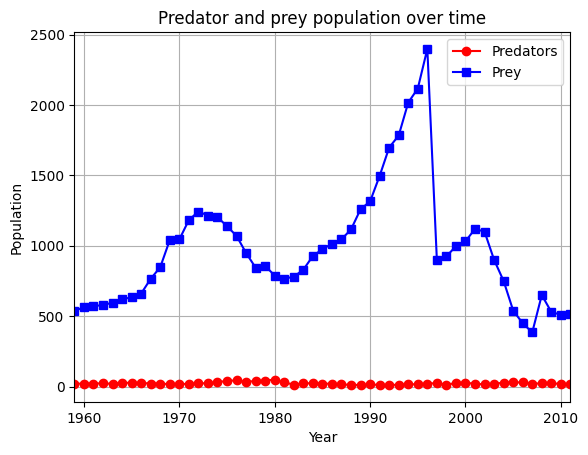

In [217]:
# Create your first figure here
df = np.load("ecology.npy")

plt.plot(df[:, 0], df[:, 1], label="Predators", color="red", marker="o") #plots number of predators
plt.plot(df[:, 0], df[:, 2], label="Prey", color="blue", marker="s") #plots number of prey

ax = plt.gca()
ax.set_xlim(df[0, 0], df[-1, 0])

plt.xlabel("Year")
plt.ylabel("Population")
plt.title("Predator and prey population over time")
plt.legend()
plt.grid()
plt.show()

[[1959.           20.          538.15108689]
 [1960.           22.          563.59382042]
 [1961.           22.          571.59835837]
 [1962.           23.          579.33611955]
 [1963.           20.          595.95243757]
 [1964.           26.          620.37825526]
 [1965.           28.          634.00068496]
 [1966.           26.          660.93174548]
 [1967.           22.          765.59825334]
 [1968.           22.          848.01750943]
 [1969.           17.         1040.71569859]
 [1970.           18.         1045.00438366]
 [1971.           20.         1182.57549962]
 [1972.           23.         1243.10590494]
 [1973.           24.         1214.97029982]
 [1974.           31.         1203.19613736]
 [1975.           41.         1138.98476472]
 [1976.           44.         1070.08577245]
 [1977.           34.          948.76982423]
 [1978.           40.          844.50656958]
 [1979.           43.          856.98202932]
 [1980.           50.          788.45696232]
 [1981.   

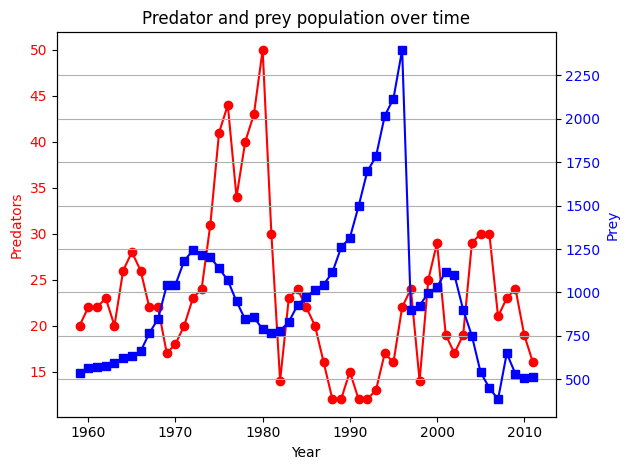

In [213]:
# Create your second figure here
df = np.load("ecology.npy")

year = df[:, 0]
predator = df[:, 1]
prey = df[:, 2]

fig, ax1 = plt.subplots()

ax1.plot(year, predator, label="Predators", color="red", marker="o")
ax1.set_xlabel("Year")
ax1.set_ylabel("Predators", color="red")
ax1.tick_params(axis="y", labelcolor="red")

ax2 = ax1.twinx()
ax2.plot(year, prey, label="Prey", color="blue", marker="s")
ax2.set_ylabel("Prey", color="blue")
ax2.tick_params(axis="y", labelcolor="blue")

plt.title("Predator and prey population over time")

fig.tight_layout()
plt.grid()
plt.show()

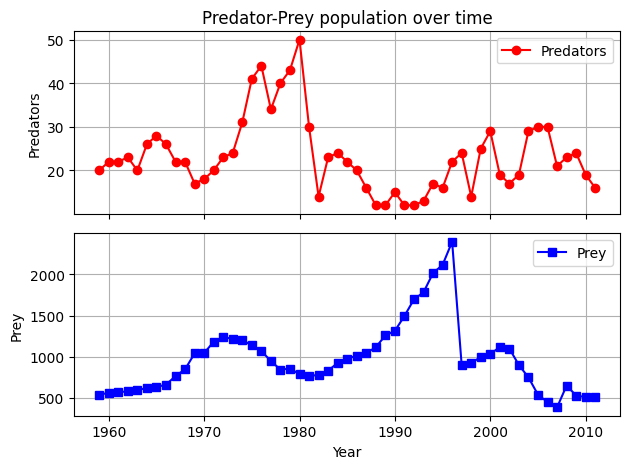

In [218]:
# Create your third figure here
df = np.load("ecology.npy")

year = df[:, 0]
predator = df[:, 1]
prey = df[:, 2]

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

ax1.plot(year, predator, label="Predators", color="red", marker="o")
ax1.set_ylabel("Predators")
ax1.set_title("Predator-Prey population over time")
ax1.legend()
ax1.grid()

ax2.plot(year, prey, label="Prey", color="blue", marker="s")
ax2.set_ylabel("Prey")
ax2.set_xlabel("Year")
ax2.legend()
ax2.grid()

plt.tight_layout()
plt.show()

[//]: # "Markdown code cells can either be displayed in a rendered fashion, or as source. You are now looking at the source code, and this is a comment."
[//]: # "To exit this mode, you must 'run' this markdown block."
[//]: # "In Jupyter Lab: you make sure this block is selected, and then press the 'run' button. In VSC you press the ✓ (check mark)"
[//]: # "In both programs pressing 'CTRL'+'ENTER' will run the current cell."

## 5.2 Data Rates
Make sure you have read relevant parts of `plot.pdf`

In this second plot you will create a histogram using the data generated by the given code:

In [ ]:
number_of_users = 1000

# Place users randomly in the area, (x,y)
user_pos = np.random.uniform(0, 2000, (2, number_of_users))
# Set the minimum distance for all users to inf
d = np.ones((user_pos.shape[1]))*np.inf

for bx, by in [(2000, 2000), (0, 2000), (0, 0), (2000, 0), (1000, 1000)]:
    # Loop over each base station position and find the minimum distance from
    # all users to any base station
    d = np.minimum(np.sqrt((user_pos[0,:]-bx)**2+(user_pos[1,:]-by)**2), d)

kappa = 4
sigma2 = 10**(-11.2)
B = 10e6

# Compute the received power 
P = 1/((1+d)**(kappa) * (sigma2))
# Compute the achievable rate given the received power
R = np.zeros_like(d)
R[P >= 0.3] = B * np.log2(1 + np.minimum(P[P >= 0.3], 63))

In [ ]:
# Compute the coverage percentage

# Compute average data rate among the users who have coverage


[//]: # "Markdown code cells can either be displayed in a rendered fashion, or as source. You are now looking at the source code, and this is a comment."
[//]: # "To exit this mode, you must 'run' this markdown block."
[//]: # "In Jupyter Lab: you make sure this block is selected, and then press the 'run' button. In VSC you press the ✓ (check mark)"
[//]: # "In both programs pressing 'CTRL'+'ENTER' will run the current cell."

Because of the data, the histogram should feature:
- A peak at zero, for those who have so low data rate such that we don't count it.
- A peak at the maximum data rate, for those who are close enough to a base station to get the highest speed.
- A (rather) smooth curve in between. (if you increase `number_of_users` the plot should become smoother, but increase computational load.)

To give some guidance, we provide links to examples presented in `matplotlib`s documentation. 
- [The list of all examples](https://matplotlib.org/stable/gallery/index.html#examples)
- [Histograms](https://matplotlib.org/stable/gallery/statistics/hist.html#sphx-glr-gallery-statistics-hist-py)


In [ ]:
# Implement your plot here.
